In [2]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

sns.set()

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


%load_ext autoreload
%autoreload 2

In [40]:
# load data from ROOT, use pandas read_csv
data_df = pd.read_csv('income.csv', header=0)
# get summary of the data
print(data_df.describe())
print(data_df.isnull().values.any())

                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  
False


In [41]:
# looking for the levels on each category columns
# first get all numeirc columns
data_df_numeric_column_name=list(data_df.select_dtypes(include=[np.number]))
data_df_numeric = data_df[data_df_numeric_column_name]
data_df_column_name = list(data_df)
print(data_df_numeric_column_name)
print()
# find all category columns
data_df_category_column_name = [a for a in data_df_column_name if a not in data_df_numeric_column_name]
data_df_category = data_df[data_df_category_column_name]
print(data_df_category_column_name)
print()
# let's look the category columns levels
print(pd.crosstab(data_df['workclass'],data_df['class']))

# WTF... it has a character '?' as a level? let's see other catgories...
print(pd.crosstab(data_df['education'],data_df['class']))
print(pd.crosstab(data_df['marital-status'],data_df['class']))
print(pd.crosstab(data_df['occupation'],data_df['class']))
print(pd.crosstab(data_df['relationship'],data_df['class']))
print(pd.crosstab(data_df['race'],data_df['class']))
print(pd.crosstab(data_df['sex'],data_df['class']))
print(pd.crosstab(data_df['native-country'],data_df['class']))
print(pd.crosstab(data_df['class'],data_df['class']))

['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'class']

class               <=50K   >50K
workclass                       
 ?                   1645    191
 Federal-gov          589    371
 Local-gov           1476    617
 Never-worked           7      0
 Private            17733   4963
 Self-emp-inc         494    622
 Self-emp-not-inc    1817    724
 State-gov            945    353
 Without-pay           14      0
class           <=50K   >50K
education                   
 10th             871     62
 11th            1115     60
 12th             400     33
 1st-4th          162      6
 5th-6th          317     16
 7th-8th          606     40
 9th              487     27
 Assoc-acdm       802    265
 Assoc-voc       1021    361
 Bachelors       3134   2221
 Doctorate        107    306
 HS-grad         8826   1675
 Masters          764    95

In [50]:
# remove the space in the cells
data_df_category1 = data_df_category
for a in data_df_category_column_name:
    data_df_category1[a] = data_df_category1[a].str.strip()

C:\Users\zhang\AppData\Local\Programs\Python\Python36-32\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [51]:
#change '?' to unknown
for a in data_df_category_column_name:
    data_df_category1[a] = data_df_category1[a].str.replace('?','unknown')
    print(pd.crosstab(data_df_category1[a],data_df_category1['class']))

#data_df_category['workclass'] = data_df_category['workclass'].str.replace('?','unknown')
#print(data_df_category_column_name)

class             <=50K  >50K
workclass                    
Private           17733  4963
Self-emp-inc        494   622
Self-emp-not-inc   1817   724
gov                3010  1341
unemployee           21     0
unknown            1645   191
class         <=50K  >50K
education                
10th            871    62
11th           1115    60
12th            400    33
1st-4th         162     6
5th-6th         317    16
7th-8th         606    40
9th             487    27
Assoc-acdm      802   265
Assoc-voc      1021   361
Bachelors      3134  2221
Doctorate       107   306
HS-grad        8826  1675
Masters         764   959
Preschool        51     0
Prof-school     153   423
Some-college   5904  1387
class                  <=50K  >50K
marital-status                    
Divorced                3980   463
Married-AF-spouse         13    10
Married-civ-spouse      8284  6692
Married-spouse-absent    384    34
Never-married          10192   491
Separated                959    66
Widowed     

C:\Users\zhang\AppData\Local\Programs\Python\Python36-32\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [52]:
#do some feature engineering for workclass
data_df_category1.workclass = data_df_category1.workclass.str.replace('Federal-gov','gov')
data_df_category1.workclass = data_df_category1.workclass.str.replace('Local-gov','gov')
data_df_category1.workclass = data_df_category1.workclass.str.replace('State-gov','gov')
data_df_category1.workclass = data_df_category1.workclass.str.replace('Never-worked','unemployee')
data_df_category1.workclass = data_df_category1.workclass.str.replace('Without-pay','unemployee')

print(pd.crosstab(data_df_category1.workclass,data_df_category1.iloc[:,8]))


class             <=50K  >50K
workclass                    
Private           17733  4963
Self-emp-inc        494   622
Self-emp-not-inc   1817   724
gov                3010  1341
unemployee           21     0
unknown            1645   191


C:\Users\zhang\AppData\Local\Programs\Python\Python36-32\lib\site-packages\pandas\core\generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [53]:
# create a function to do the feature engineering
def switchattributeto(dataframename,target_class,feature,attribute_org,attribute_new):
    dataframename.feature = dataframename.feature.str.replace(attribute_org,attribute_new)
    print(pd.crosstab(dataframename.feature,dataframename.target_class))


In [54]:
# further we need to hot encode the class to 1 or 0, 1  == > 50k; 0 == < 50k;
data_df_category1=pd.concat([
        data_df_category1.drop("class", 1),
        data_df_category1['class'].str.get_dummies()
    ], axis=1)

In [55]:
print(list(data_df_category1))

['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', '<=50K', '>50K']


In [56]:
# drop column '<50k'
data_df_category1 = data_df_category1.drop("<=50K", 1)
print(list(data_df_category1))

print(pd.crosstab(data_df_category1.iloc[:,8],data_df_category1.iloc[:,8]))

['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', '>50K']
>50K      0     1
>50K             
0     24720     0
1         0  7841


In [72]:
# calculate the weight of evidence and information value for category column workclass
import math

print(data_df_category1['>50K'].dtype)
attributelist1 = data_df_category1.workclass.unique()
total_1 = len(data_df_category1[(data_df_category1['>50K'] == 1)])
total_0 = len(data_df_category1[(data_df_category1['>50K'] == 0)])

for a in attributelist1:
    count_all = len(data_df_category1[(data_df_category1['workclass'] == a)])
    count_1 = len(data_df_category1[(data_df_category1['workclass'] == a) & (data_df_category1['>50K'] == 1)])
    count_0 = count_all-count_1
    if count_1 == 0:
        count_1 = 1
    else:
        count_1
    if count_0 == 0:
        count_0 = 1
    else:
        count_0
    count_1_rate = count_1/total_1
    count_0_rate = count_0/total_0
    woe_a = math.log(count_1_rate/count_0_rate)
    iv_a = (count_1_rate-count_0_rate)*math.log(count_1_rate/count_0_rate)
    count_1_rate = float("{0:.3f}".format(count_1_rate))
    count_0_rate = float("{0:.3f}".format(count_0_rate))
    woe_a = float("{0:.3f}".format(woe_a))
    iv_a = float("{0:.3f}".format(iv_a))
    print(a,count_1,(count_all-count_1),count_0,count_1_rate,count_0_rate,woe_a,iv_a)

int64
gov 1341 3010 3010 0.171 0.122 0.34 0.017
Self-emp-not-inc 724 1817 1817 0.092 0.074 0.228 0.004
Private 4963 17733 17733 0.633 0.717 -0.125 0.011
unknown 191 1645 1645 0.024 0.067 -1.005 0.042
Self-emp-inc 622 494 494 0.079 0.02 1.379 0.082
unemployee 1 20 21 0.0 0.001 -1.896 0.001


In [111]:
# let's def a function for calculating the woe and iv
def woe_iv (df,feature_index,targetfeature_index,level_index):
    
    attributelistlist = df.iloc[:,feature_index].unique()
    total_1 = len(df[(df.iloc[:,targetfeature_index] == 1)])
    total_0 = len(df[(df.iloc[:,targetfeature_index] == 0)])
    
    column_woe = 0
    column_iv = 0
    
    for a in attributelistlist:
        
        count_1 = len(df[(df.iloc[:,feature_index] == a) & (df.iloc[:,targetfeature_index] == 1)])
        count_0 = len(df[(df.iloc[:,feature_index] == a) & (df.iloc[:,targetfeature_index] == 0)])
        
        count_1_rate = count_1/total_1
        count_0_rate = count_0/total_0
        
        if count_1_rate == 0:
            count_1_rate = 1/ total_1
        else:
            count_1_rate
        
        if count_0_rate ==0:
            count_0_rate = 1/total_0
        else:
            count_0_rate
        
        woe_a = math.log(count_1_rate/count_0_rate)
        iv_a = (count_1_rate-count_0_rate)*math.log(count_1_rate/count_0_rate)
        
        count_1_rate = float("{0:.3f}".format(count_1_rate))
        count_0_rate = float("{0:.3f}".format(count_0_rate))
        woe_a = float("{0:.3f}".format(woe_a))
        iv_a = float("{0:.3f}".format(iv_a))
        
        column_iv += iv_a
        column_iv = float("{0:.3f}".format(column_iv))
        
        # level_index will be 0 or 1, 0 means not need column attributes' woe and iv
        if level_index == 1:
            print(a,count_1,count_0,count_1_rate,count_0_rate,woe_a,iv_a)    
                
    return (column_iv)

In [113]:
# test with workclass
woe_iv(data_df_category1,0,8,0)
woe_iv(data_df_category1,0,8,1)

gov 1341 3010 0.171 0.122 0.34 0.017
Self-emp-not-inc 724 1817 0.092 0.074 0.228 0.004
Private 4963 17733 0.633 0.717 -0.125 0.011
unknown 191 1645 0.024 0.067 -1.005 0.042
Self-emp-inc 622 494 0.079 0.02 1.379 0.082
unemployee 0 21 0.0 0.001 -1.896 0.001


0.157

In [117]:
# use function woe_iv to run all category column
for a in range(8):
    print(woe_iv(data_df_category1,a,8,0))

0.157
0.743
1.339
0.778
1.536
0.071
0.303
0.079


In [119]:
# from the above information value on all category columns, we could see that, the smallest iv is index 7, index 5, let's have 
# a look on why they had such a small information value
# for index 5, race column

print(pd.crosstab(data_df_category1.iloc[:,5],data_df_category1.iloc[:,8]))

# ok, for 32561 rows, 27816 rows will be the White race, so 85.6% data will be white...it is not that helpful for prediction

# for index 8, nationality column
print(pd.crosstab(data_df_category1.iloc[:,7],data_df_category1.iloc[:,8]))

# ok, for 32561 rows, more than 89% will be the US natoinality, so same, not helpful for prediction

>50K                    0     1
race                           
Amer-Indian-Eskimo    275    36
Asian-Pac-Islander    763   276
Black                2737   387
Other                 246    25
White               20699  7117
>50K                            0     1
native-country                         
Cambodia                       12     7
Canada                         82    39
China                          55    20
Columbia                       57     2
Cuba                           70    25
Dominican-Republic             68     2
Ecuador                        24     4
El-Salvador                    97     9
England                        60    30
France                         17    12
Germany                        93    44
Greece                         21     8
Guatemala                      61     3
Haiti                          40     4
Holand-Netherlands              1     0
Honduras                       12     1
Hong                           14     6
Hungary         

In [127]:
# from the above information value on all category columns, we could see that, the largest iv is index 4, index 2, let's have 
# a look on why they had such a small information value
# for index 4, relationship column

print(pd.crosstab(data_df_category1.iloc[:,4],data_df_category1.iloc[:,8]))
# cool, from this relationship category, we could see that being husband has larger chance to be >50k, and other catgeory is 
# also evenly distributed 

print(pd.crosstab(data_df_category1.iloc[:,2],data_df_category1.iloc[:,8]))


>50K               0     1
relationship              
Married         8098  6663
Not-in-family   7449   856
Other-relative   944    37
Own-child       5001    67
Unmarried       3228   218
>50K                       0     1
marital-status                    
Divorced                3980   463
Married-AF-spouse         13    10
Married-civ-spouse      8284  6692
Married-spouse-absent    384    34
Never-married          10192   491
Separated                959    66
Widowed                  908    85


In [123]:
# well even relationship and occupation is important, but they had too many factors in each, so we try to reduce the level
# in relationship, we see husband and wife are basicly same meaning --- married, well we could use gender to identify the role
# let's combine them then
data_df_category1.relationship = data_df_category1.relationship.str.replace('Husband','Married')
data_df_category1.relationship = data_df_category1.relationship.str.replace('Wife','Married')
print(pd.crosstab(data_df_category1.iloc[:,4],data_df_category1.iloc[:,8]))

>50K               0     1
relationship              
Married         8098  6663
Not-in-family   7449   856
Other-relative   944    37
Own-child       5001    67
Unmarried       3228   218


In [130]:
# same for index 2, well actually these two column are all talking about marrage, let's do a crosstab and have a look then

print(pd.crosstab(data_df_category1.iloc[:,4],data_df_category1.iloc[:,2]))
# well we see if relationship is married, then only had Married-spouse avaiable, so we could say married-spouse 
# is stable_relationship
# so let's combine these two together:

data_df_category1.iloc[:,2] = data_df_category1['marital-status'].str.replace('Married-AF-spouse','stabled_marrage')
data_df_category1.iloc[:,2] = data_df_category1['marital-status'].str.replace('Married-civ-spouse','stabled_marrage')

print(pd.crosstab(data_df_category1.iloc[:,2],data_df_category1.iloc[:,8]))

marital-status  Divorced  Married-AF-spouse  Married-civ-spouse  \
relationship                                                      
Married                0                 21               14740   
Not-in-family       2404                  0                  17   
Other-relative       110                  1                 124   
Own-child            328                  1                  95   
Unmarried           1601                  0                   0   

marital-status  Married-spouse-absent  Never-married  Separated  Widowed  
relationship                                                              
Married                             0              0          0        0  
Not-in-family                     211           4706        420      547  
Other-relative                     32            611         55       48  
Own-child                          45           4485         99       15  
Unmarried                         130            881        451      383  
>50K 

In [124]:
# for rest of the category column, index 1 and index 3, let's look index 3 first
# same for occupation, we see exec-managerial and prof-specialty are all professionals
# armed-force and protective-serv are all military related
# unkown could be treat as Other-service
# priv-house-serv are similar to handler-cleaner, we call them property_handler
# Adm-clerical are similar to Tech-support, we call them office_support
# Machine-op-inspct and transport-moving are similar to machanical_specialist
# sales and craft_repair could be as retail 

data_df_category1.occupation = data_df_category1.occupation.str.replace('Exec-managerial','professionals')
data_df_category1.occupation = data_df_category1.occupation.str.replace('Prof-specialty','professionals')

data_df_category1.occupation = data_df_category1.occupation.str.replace('Armed-Forces','military')
data_df_category1.occupation = data_df_category1.occupation.str.replace('Protective-serv','military')

data_df_category1.occupation = data_df_category1.occupation.str.replace('unknown','Other-service')

data_df_category1.occupation = data_df_category1.occupation.str.replace('Priv-house-serv','property_handler')
data_df_category1.occupation = data_df_category1.occupation.str.replace('Handlers-cleaners','property_handler')

data_df_category1.occupation = data_df_category1.occupation.str.replace('Adm-clerical','office_support')
data_df_category1.occupation = data_df_category1.occupation.str.replace('Tech-support','office_support')

data_df_category1.occupation = data_df_category1.occupation.str.replace('Machine-op-inspct','machanical_specialist')
data_df_category1.occupation = data_df_category1.occupation.str.replace('Transport-moving','machanical_specialist')

data_df_category1.occupation = data_df_category1.occupation.str.replace('Sales','retail')
data_df_category1.occupation = data_df_category1.occupation.str.replace('Craft-repair','retail')

print(pd.crosstab(data_df_category1.iloc[:,3],data_df_category1.iloc[:,8]))

>50K                      0     1
occupation                       
Farming-fishing         879   115
Other-service          4810   328
machanical_specialist  3029   570
military                446   212
office_support         3908   790
professionals          4379  3827
property_handler       1432    87
retail                 5837  1912


In [132]:
# let's look the index 1 then 
# in US, we define the education class as pre_school < 1-4 <5-6 <7-8 <9 <10 <11 <12 <hs-grad <prof_school < assoc_acdm 
# < some_colleage < bachelors < masters < doc 
# then we could say from pre_school to 12 is 'low_education', hs-grad to assoc_acdm is 'qualified', some_colleage to bachelors 
# is 'high_education', from master to doctor is 'higher_education'

data_df_category1.education = data_df_category1.education.str.replace('Preschool','low_education')
data_df_category1.education = data_df_category1.education.str.replace('1st-4th','low_education')
data_df_category1.education = data_df_category1.education.str.replace('5th-6th','low_education')
data_df_category1.education = data_df_category1.education.str.replace('7th-8th','low_education')
data_df_category1.education = data_df_category1.education.str.replace('9th','low_education')
data_df_category1.education = data_df_category1.education.str.replace('10th','low_education')
data_df_category1.education = data_df_category1.education.str.replace('11th','low_education')
data_df_category1.education = data_df_category1.education.str.replace('12th','low_education')

data_df_category1.education = data_df_category1.education.str.replace('Assoc-voc','Assoc')
data_df_category1.education = data_df_category1.education.str.replace('Assoc-acdm','Assoc')

data_df_category1.education = data_df_category1.education.str.replace('Bachelors','higher_education')
data_df_category1.education = data_df_category1.education.str.replace('Masters','higher_education')
data_df_category1.education = data_df_category1.education.str.replace('Prof-school','higher_education')
data_df_category1.education = data_df_category1.education.str.replace('Doctorate','higher_education')

print(pd.crosstab(data_df_category1.iloc[:,1],data_df_category1.iloc[:,8]))

>50K                 0     1
education                   
Assoc             1823   626
HS-grad           8826  1675
Some-college      5904  1387
higher_education  4158  3909
low_education     4009   244


In [134]:
# afther reduce the level, we re-calculate the IV for category columns
print(list(data_df_category1))

# calculate IV 
for a in range(8):
    print(woe_iv(data_df_category1,a,8,0))
    
# compare the results before:
# indexNo.    IV_before     IV_now
#   0       0.157            0.157
#   1       0.743            0.668
#   2       1.339            1.338
#   3       0.778            0.702
#   4       1.536            1.535
#   5       0.071            0.071
#   6       0.303            0.303
#   7       0.079            0.079

# not too much change, ok now we use IV value to replace the category in each column's attributes

['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', '>50K']
0.157
0.668
1.338
0.702
1.535
0.071
0.303
0.079


In [135]:
# first duplicate the column
data_df_category2 = data_df_category1

# then drop index 5 and index 7
cols = [5,7]
data_df_category2.drop(data_df_category2.columns[cols],axis=1,inplace=True)

print(list(data_df_category2))

['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'sex', '>50K']


In [136]:
# for index 0 in df, the IV value is like:
#gov 1341 3010 0.171 0.122 0.34 0.017
#Self-emp-not-inc 724 1817 0.092 0.074 0.228 0.004
#Private 4963 17733 0.633 0.717 -0.125 0.011
#unknown 191 1645 0.024 0.067 -1.005 0.042
#Self-emp-inc 622 494 0.079 0.02 1.379 0.082
#unemployee 0 21 0.0 0.001 -1.896 0.001

data_df_category2.workclass = data_df_category2.workclass.str.replace('gov','0.017')
data_df_category2.workclass = data_df_category2.workclass.str.replace('Self-emp-not-inc','0.004')
data_df_category2.workclass = data_df_category2.workclass.str.replace('Private','0.011')
data_df_category2.workclass = data_df_category2.workclass.str.replace('unknown','0.042')
data_df_category2.workclass = data_df_category2.workclass.str.replace('Self-emp-inc','0.082')
data_df_category2.workclass = data_df_category2.workclass.str.replace('unemployee','0.001')

data_df_category2.workclass = pd.to_numeric(data_df_category2.workclass, errors='coerce')

In [141]:
# calculate the IV for index 1:

woe_iv(data_df_category2,1,6,1)

# then assign the value to column and transform the column to numeric 

data_df_category2.education = data_df_category2.education.str.replace('higher_education','0.359')
data_df_category2.education = data_df_category2.education.str.replace('HS-grad','0.074')
data_df_category2.education = data_df_category2.education.str.replace('low_education','0.216')
data_df_category2.education = data_df_category2.education.str.replace('Some-college','0.019')
data_df_category2.education = data_df_category2.education.str.replace('Assoc','0.000474')

data_df_category2.education = pd.to_numeric(data_df_category2.education, errors='coerce')

print(data_df_category2.education.describe())

higher_education 3909 4158 0.499 0.168 1.086 0.359
HS-grad 1675 8826 0.214 0.357 -0.514 0.074
low_education 244 4009 0.031 0.162 -1.651 0.216
Some-college 1387 5904 0.177 0.239 -0.3 0.019
Assoc 626 1823 0.08 0.074 0.079 0.0
count    32561.000000
mean         0.145311
std          0.136955
min          0.000474
25%          0.019000
50%          0.074000
75%          0.216000
max          0.359000
Name: education, dtype: float64


In [143]:
# calculate the IV for index 2:

woe_iv(data_df_category2,2,6,1)

# then assign the value to column and transform the column to numeric 

data_df_category2['marital-status'] = data_df_category2['marital-status'].str.replace('Never-married','0.659')
data_df_category2['marital-status'] = data_df_category2['marital-status'].str.replace('stabled_marrage','0.485')
data_df_category2['marital-status'] = data_df_category2['marital-status'].str.replace('Divorced','0.102')
data_df_category2['marital-status'] = data_df_category2['marital-status'].str.replace('Married-spouse-absent','0.014')
data_df_category2['marital-status'] = data_df_category2['marital-status'].str.replace('Separated','0.046')
data_df_category2['marital-status'] = data_df_category2['marital-status'].str.replace('Widowed','0.032')

data_df_category2['marital-status'] = pd.to_numeric(data_df_category2['marital-status'], errors='coerce')

print(data_df_category2['marital-status'].describe())

Never-married 491 10192 0.063 0.412 -1.885 0.659
stabled_marrage 6702 8297 0.855 0.336 0.935 0.485
Divorced 463 3980 0.059 0.161 -1.003 0.102
Married-spouse-absent 34 384 0.004 0.016 -1.276 0.014
Separated 66 959 0.008 0.039 -1.528 0.046
Widowed 85 908 0.011 0.037 -1.22 0.032
count    32561.000000
mean         0.456146
std          0.210454
min          0.014000
25%          0.485000
50%          0.485000
75%          0.659000
max          0.659000
Name: marital-status, dtype: float64


In [145]:
# calculate the IV for index 3:

woe_iv(data_df_category2,3,6,1)

# then assign the value to column and transform the column to numeric 
data_df_category2.occupation = data_df_category2.occupation.str.replace('office_support','0.026')
data_df_category2.occupation = data_df_category2.occupation.str.replace('professionals','0.315')
data_df_category2.occupation = data_df_category2.occupation.str.replace('property_handler','0.077')
data_df_category2.occupation = data_df_category2.occupation.str.replace('Other-service','0.235')
data_df_category2.occupation = data_df_category2.occupation.str.replace('retail','0.000256')
data_df_category2.occupation = data_df_category2.occupation.str.replace('machanical_specialist','0.026')
data_df_category2.occupation = data_df_category2.occupation.str.replace('Farming-fishing','0.019')
data_df_category2.occupation = data_df_category2.occupation.str.replace('military','0.004')

data_df_category2.occupation = pd.to_numeric(data_df_category2.occupation, errors='coerce')

print(data_df_category2.occupation.describe())

office_support 790 3908 0.101 0.158 -0.451 0.026
professionals 3827 4379 0.488 0.177 1.014 0.315
property_handler 87 1432 0.011 0.058 -1.653 0.077
Other-service 328 4810 0.042 0.195 -1.537 0.235
retail 1912 5837 0.244 0.236 0.032 0.0
machanical_specialist 570 3029 0.073 0.123 -0.522 0.026
Farming-fishing 115 879 0.015 0.036 -0.886 0.019
military 212 446 0.027 0.018 0.405 0.004
count    32561.000000
mean         0.127407
std          0.133974
min          0.000256
25%          0.004000
50%          0.026000
75%          0.315000
max          0.315000
Name: occupation, dtype: float64


In [147]:
# calculate the IV for index 4:

woe_iv(data_df_category2,4,6,1)

# then assign the value to column and transform the column to numeric 

data_df_category2.relationship = data_df_category2.relationship.str.replace('Not-in-family','0.195')
data_df_category2.relationship = data_df_category2.relationship.str.replace('Married','0.498')
data_df_category2.relationship = data_df_category2.relationship.str.replace('Own-child','0.613')
data_df_category2.relationship = data_df_category2.relationship.str.replace('Unmarried','0.159')
data_df_category2.relationship = data_df_category2.relationship.str.replace('Other-relative','0.07')

data_df_category2.relationship = pd.to_numeric(data_df_category2.relationship, errors='coerce')

print(data_df_category2.relationship.describe())

Not-in-family 856 7449 0.109 0.301 -1.015 0.195
Married 6663 8098 0.85 0.328 0.953 0.498
Own-child 67 5001 0.009 0.202 -3.164 0.613
Unmarried 218 3228 0.028 0.131 -1.547 0.159
Other-relative 37 944 0.005 0.038 -2.091 0.07
count    32561.000000
mean         0.389844
std          0.177369
min          0.070000
25%          0.195000
50%          0.498000
75%          0.498000
max          0.613000
Name: relationship, dtype: float64


In [149]:
# calculate the IV for index 5:

woe_iv(data_df_category2,5,6,1)

# then assign the value to column and transform the column to numeric 

data_df_category2.sex = data_df_category2.sex.str.replace('Male','0.078')
data_df_category2.sex = data_df_category2.sex.str.replace('Female','0.225')

data_df_category2.sex = pd.to_numeric(data_df_category2.sex, errors='coerce')

print(data_df_category2.sex.describe())

Male 6662 15128 0.85 0.612 0.328 0.078
Female 1179 9592 0.15 0.388 -0.948 0.225
count    32561.000000
mean         0.126627
std          0.069164
min          0.078000
25%          0.078000
50%          0.078000
75%          0.225000
max          0.225000
Name: sex, dtype: float64


In [152]:
# finished! let's check the data_df_category2
print(data_df_category2.describe())

# let's concate the new data to the data_df_numeric
data_df_all_numeric = pd.concat([data_df_numeric,data_df_category2], axis=1)
print(list(data_df_all_numeric))

          workclass     education  marital-status    occupation  relationship  \
count  32561.000000  32561.000000    32561.000000  32561.000000  32561.000000   
mean       0.015430      0.145311        0.456146      0.127407      0.389844   
std        0.014698      0.136955        0.210454      0.133974      0.177369   
min        0.001000      0.000474        0.014000      0.000256      0.070000   
25%        0.011000      0.019000        0.485000      0.004000      0.195000   
50%        0.011000      0.074000        0.485000      0.026000      0.498000   
75%        0.011000      0.216000        0.659000      0.315000      0.498000   
max        0.082000      0.359000        0.659000      0.315000      0.613000   

                sex          >50K  
count  32561.000000  32561.000000  
mean       0.126627      0.240810  
std        0.069164      0.427581  
min        0.078000      0.000000  
25%        0.078000      0.000000  
50%        0.078000      0.000000  
75%        0.22500

C:\Users\zhang\AppData\Local\Programs\Python\Python36-32\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.


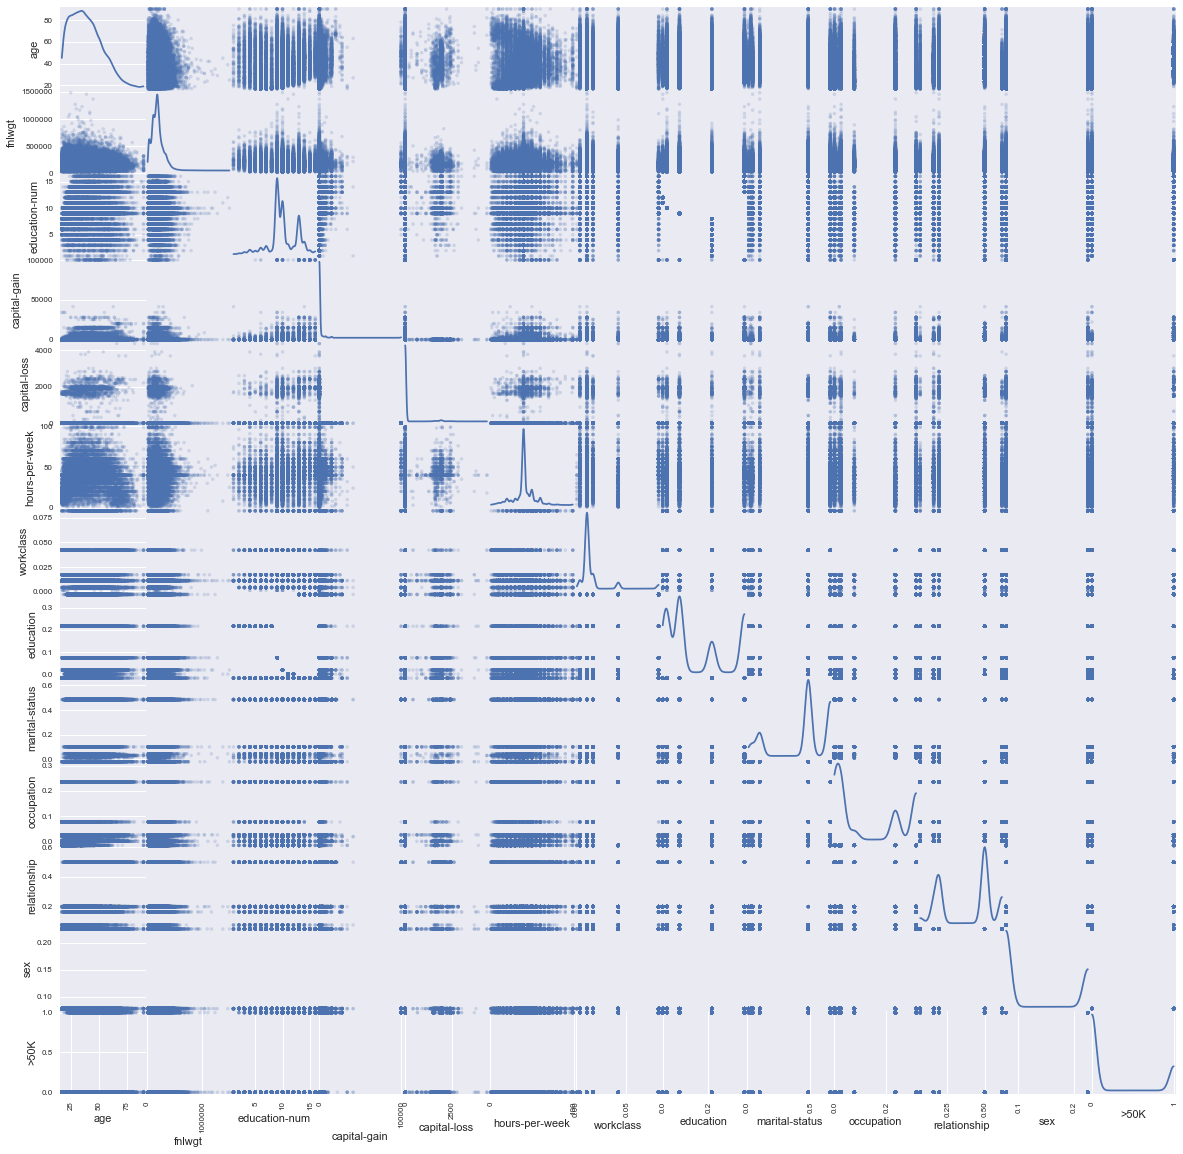

In [157]:
# let's build a grid visual to show all numeric data's relationship and try to find something
from pandas.tools.plotting import scatter_matrix



scatter_matrix(data_df_all_numeric,figsize=[20,20],alpha=0.2,  diagonal='kde')
plt.show()

In [167]:
data_df_numeric1 = data_df_numeric

data_df_numeric1 = data_df_numeric1.apply(lambda x: x/x.max(), axis=0)

print(data_df_numeric1.describe())

                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  32561.000000   32561.000000  32561.000000  32561.000000   
mean       0.428685      0.127822       0.630042      0.010777      0.020042   
std        0.151560      0.071092       0.160795      0.073854      0.092507   
min        0.188889      0.008274       0.062500      0.000000      0.000000   
25%        0.311111      0.079361       0.562500      0.000000      0.000000   
50%        0.411111      0.120129       0.625000      0.000000      0.000000   
75%        0.533333      0.159662       0.750000      0.000000      0.000000   
max        1.000000      1.000000       1.000000      1.000000      1.000000   

       hours-per-week  
count    32561.000000  
mean         0.408459  
std          0.124722  
min          0.010101  
25%          0.404040  
50%          0.404040  
75%          0.454545  
max          1.000000  


In [169]:
data_df_all_numeric1 = pd.concat([data_df_numeric1,data_df_category2], axis=1)

data_df_all_numeric1.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,sex,>50K
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.104232,0.105187,-0.394708,0.076277,-0.090749,-0.088832,0.234037
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,-0.019754,-0.002004,0.022189,-0.026480,-0.015452,-0.026858,-0.009463
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,0.050404,0.433048,0.046285,0.332609,0.007929,-0.012280,0.335154
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,0.071612,0.106757,-0.003037,0.078872,0.032036,-0.048480,0.223329
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,0.019479,0.064610,-0.001436,0.040163,0.030413,-0.045567,0.150526
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,0.018887,0.093936,-0.045637,-0.001821,-0.022105,-0.229309,0.229689
workclass,0.104232,-0.019754,0.050404,0.071612,0.019479,0.018887,1.000000,0.044737,-0.008386,0.161882,0.051107,-0.022897,0.089535
education,0.105187,-0.002004,0.433048,0.106757,0.064610,0.093936,0.044737,1.000000,0.042578,0.327526,-0.003139,-0.065606,0.245060
marital-status,-0.394708,0.022189,0.046285,-0.003037,-0.001436,-0.045637,-0.008386,0.042578,1.000000,-0.014733,0.377336,-0.195535,0.017357
occupation,0.076277,-0.026480,0.332609,0.078872,0.040163,-0.001821,0.161882,0.327526,-0.014733,1.000000,-0.033937,0.101195,0.176478


In [181]:
#we could see education and education-num had strong relationship, let's keep all them for now and use logistics regression

data_df_all_numeric1_data = data_df_all_numeric1.drop('>50K',axis = 1)
data_df_all_numeric1_target = data_df_all_numeric1.iloc[:,12]

X = data_df_all_numeric1_data.as_matrix()
y = data_df_all_numeric1.iloc[:,12].as_matrix()

from sklearn.feature_selection import SelectFromModel

from sklearn.linear_model import LogisticRegression

class LR(LogisticRegression):
    def __init__(self, threshold=0.01, dual=False, tol=1e-4, C=1.0,
                 fit_intercept=True, intercept_scaling=1, class_weight=None,
                 random_state=None, solver='liblinear', max_iter=100,
                 multi_class='ovr', verbose=0, warm_start=False, n_jobs=1):

        #权值相近的阈值
        self.threshold = threshold
        LogisticRegression.__init__(self, penalty='l1', dual=dual, tol=tol, C=C,
                 fit_intercept=fit_intercept, intercept_scaling=intercept_scaling, class_weight=class_weight,
                 random_state=random_state, solver=solver, max_iter=max_iter,
                 multi_class=multi_class, verbose=verbose, warm_start=warm_start, n_jobs=n_jobs)
        #使用同样的参数创建L2逻辑回归
        self.l2 = LogisticRegression(penalty='l2', dual=dual, tol=tol, C=C, fit_intercept=fit_intercept, 
                                     intercept_scaling=intercept_scaling, class_weight = class_weight,random_state=random_state, 
                                     solver=solver, max_iter=max_iter, multi_class=multi_class, verbose=verbose, 
                                     warm_start=warm_start, 
                                     n_jobs=n_jobs)

    def fit(self, X, y, sample_weight=None):
        #训练L1逻辑回归
        super(LR, self).fit(X, y, sample_weight=sample_weight)
        self.coef_old_ = self.coef_.copy()
        #训练L2逻辑回归
        self.l2.fit(X, y, sample_weight=sample_weight)

        cntOfRow, cntOfCol = self.coef_.shape
        #权值系数矩阵的行数对应目标值的种类数目
        for i in range(cntOfRow):
            for j in range(cntOfCol):
                coef = self.coef_[i][j]
                #L1逻辑回归的权值系数不为0
                if coef != 0:
                    idx = [j]
                    #对应在L2逻辑回归中的权值系数
                    coef1 = self.l2.coef_[i][j]
                    for k in range(cntOfCol):
                        coef2 = self.l2.coef_[i][k]
                        #在L2逻辑回归中，权值系数之差小于设定的阈值，且在L1中对应的权值为0
                        if abs(coef1-coef2) < self.threshold and j != k and self.coef_[i][k] == 0:
                            idx.append(k)
                    #计算这一类特征的权值系数均值
                    mean = coef / len(idx)
                    self.coef_[i][idx] = mean
        return self
xa = SelectFromModel(LogisticRegression(penalty="l1", C=0.1)).fit_transform(X, y)    
xb = SelectFromModel(LR(threshold=0.1, C=0.1)).fit_transform(X, y)
print(xa.shape)
print(xb.shape)
print(xa[0,:])
print(xb[0,:])
print(X[0,:])

# by using the L1 AND l2 to reduce the dimension, we reduce the education column

(32561, 10)
(32561, 11)
[ 0.43333333  0.0522097   0.8125      0.02174022  0.          0.4040404
  0.659       0.026       0.195       0.078     ]
[ 0.43333333  0.0522097   0.8125      0.02174022  0.          0.4040404
  0.017       0.659       0.026       0.195       0.078     ]
[ 0.43333333  0.0522097   0.8125      0.02174022  0.          0.4040404
  0.017       0.359       0.659       0.026       0.195       0.078     ]


In [182]:
# now we had the ready data set 

data_adult = data_df_all_numeric1.drop('education',axis = 1)

#split the data into train and test
x_train,x_test,y_train,y_test = train_test_split(data_adult.drop(['>50K'], axis=1), data_adult['>50K'],
                                                 test_size=0.2, random_state=10)

train_x = x_train.as_matrix()
train_y = y_train.as_matrix()

print(train_x.shape)
print(train_y.shape)

(26048, 11)
(26048,)


In [188]:
# use Logistics model and do the CV first
from sklearn import linear_model
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report,precision_score,recall_score,f1_score,roc_auc_score


fold = KFold(n_splits = 5,random_state= 10)
accuracy = []
precision = []
recall = []
f1 = []
auc = []
c = [1.0,10,100]

for i in c:
    for train,test in fold.split(train_x,train_y):
        pipeline = make_pipeline_imb(SMOTE(random_state=10, ratio='minority'),linear_model.LogisticRegression(C=i,
                   penalty='l2',dual=False,tol=0.0001,fit_intercept=True,intercept_scaling=1, class_weight=None,
                   random_state=10,solver='liblinear',max_iter=100,multi_class='ovr',verbose=0,warm_start=False,n_jobs=1))
        
        model = pipeline.fit(train_x[train],train_y[train])
        prediction = model.predict(train_x[test])
                
        accuracy.append(pipeline.score(train_x[test],train_y[test]))
        precision.append(precision_score(train_y[test],prediction))
        recall.append(recall_score(train_y[test],prediction))
        f1.append(f1_score(train_y[test],prediction))
        auc.append(roc_auc_score(train_y[test],prediction))
        print()
        print("C %d" % (i))
        print("accuracy: {}".format(np.mean(accuracy)))
        print("precision: {}".format(np.mean(precision)))
        print("recall: {}".format(np.mean(recall)))
        print("f1: {}".format(np.mean(f1)))
        print("auc: {}".format(np.mean(auc)))


C 1
accuracy: 0.783109404990403
precision: 0.5288568257491676
recall: 0.7722852512155591
f1: 0.6277997364953887
auc: 0.7793770320464113

C 1
accuracy: 0.7809980806142034
precision: 0.5310950795412505
recall: 0.7748573591500993
f1: 0.6302263988599393
auc: 0.7788857404456111

C 1
accuracy: 0.7842610364683301
precision: 0.5338690019115896
recall: 0.7859890484948883
f1: 0.6358245077028265
auc: 0.7848583658679124

C 1
accuracy: 0.7831468236173256
precision: 0.5368145012986301
recall: 0.7813610872830203
f1: 0.6363252800508806
auc: 0.7825748286585568

C 1
accuracy: 0.7832845927007333
precision: 0.5332490693933345
recall: 0.782913137608843
f1: 0.634292627759164
auc: 0.7831982050891101

C 10
accuracy: 0.7835433026184933
precision: 0.5330067512248899
recall: 0.7800613261813293
f1: 0.6331935963087686
auc: 0.7823773988946389

C 10
accuracy: 0.7833442182575843
precision: 0.5338222141588724
recall: 0.7784538192167776
f1: 0.6332396977078989
auc: 0.781701030892324

C 10
accuracy: 0.7845624673669409
p

In [193]:
# get overall performacne on C 1 C10 and C100
print('C1 performacne')
print(np.mean(accuracy[:5]))
print(np.mean(precision[:5]))
print(np.mean(recall[:5]))
print(np.mean(f1[:5]))
print(np.mean(auc[:5]))
print('C10 performacne')
print(np.mean(accuracy[5:10]))
print(np.mean(precision[5:10]))
print(np.mean(recall[5:10]))
print(np.mean(f1[5:10]))
print(np.mean(auc[5:10]))
print('C100 performacne')
print(np.mean(accuracy[10:15]))
print(np.mean(precision[10:15]))
print(np.mean(recall[10:15]))
print(np.mean(f1[10:15]))
print(np.mean(auc[10:15]))

# C = 100 works better for higher F1

C1 performacne
0.783284592701
0.533249069393
0.782913137609
0.634292627759
0.783198205089
C10 performacne
0.785933573554
0.537671001832
0.775795237501
0.635017329838
0.782522444624
C100 performacne
0.786432665448
0.538460431653
0.775644049408
0.635510792665
0.782801987187


In [203]:
from sklearn.ensemble import RandomForestClassifier
classifer = RandomForestClassifier
fold1 = KFold(n_splits = 3,random_state= 10)
accuracy_rf = []
precision_rf = []
recall_rf = []
f1_rf = []
auc_rf = []
n_estimators = [500,700,900]
max_features = ['auto', 'sqrt', 'log2']
#class_weight = [{0:1,1:3},{0:1,1:4},{0:1,1:5}]
for i in n_estimators:
    for j in max_features:
        #for k in class_weight:
        for train_rf,test_rf in fold1.split(train_x,train_y):
            pipeline_rf = make_pipeline_imb(SMOTE(random_state=10, ratio='minority'),classifer(
                        n_jobs=1,max_features= j ,n_estimators=i,oob_score = True,random_state=10))
            model_rf = pipeline_rf.fit(train_x[train_rf],train_y[train_rf])
            prediction_rf = model_rf.predict(train_x[test_rf])
                
            accuracy_rf.append(pipeline.score(train_x[test_rf],train_y[test_rf]))
            precision_rf.append(precision_score(train_y[test_rf],prediction_rf))
            recall_rf.append(recall_score(train_y[test_rf],prediction_rf))
            f1_rf.append(f1_score(train_y[test_rf],prediction_rf))
            auc_rf.append(roc_auc_score(train_y[test_rf],prediction_rf))
            print()
            print("estimators %d,MAX_FEATURE %s" % (i,j))
            print("accuracy: {}".format(np.mean(accuracy_rf)))
            print("precision: {}".format(np.mean(precision_rf)))
            print("recall: {}".format(np.mean(recall_rf)))
            print("f1: {}".format(np.mean(f1_rf)))
            print("auc: {}".format(np.mean(auc_rf)))


estimators 500,MAX_FEATURE auto
accuracy: 0.7841759760451457
precision: 0.6845895343254921
recall: 0.6868978805394991
f1: 0.6857417648473191
auc: 0.7937289463239345

estimators 500,MAX_FEATURE auto
accuracy: 0.7878613382471495
precision: 0.6857791864262022
recall: 0.6930404827973805
f1: 0.6893819564889132
auc: 0.7965542159495635

estimators 500,MAX_FEATURE auto
accuracy: 0.7868165659726447
precision: 0.6819776926339852
recall: 0.6888523853569838
f1: 0.6853918739711977
auc: 0.793643616004112

estimators 500,MAX_FEATURE sqrt
accuracy: 0.7861564184907699
precision: 0.682630653056862
recall: 0.6883637591526126
f1: 0.685479346690228
auc: 0.7936649485840677

estimators 500,MAX_FEATURE sqrt
accuracy: 0.7872344748824467
precision: 0.683498290150872
recall: 0.6905276243331425
f1: 0.6869879069782838
auc: 0.7948078559822926

estimators 500,MAX_FEATURE sqrt
accuracy: 0.7868165659726447
precision: 0.6819776926339852
recall: 0.6888523853569838
f1: 0.6853918739711977
auc: 0.793643616004112

estimato

In [ ]:
# best performance of RF in F1 value is tree = 500, Max_feature = sqr (auto = sqr)

In [205]:
from sklearn.ensemble import RandomForestClassifier

fold2 = KFold(n_splits = 3,random_state= 10)
accuracy_svm = []
precision_svm = []
recall_svm = []
f1_svm = []
auc_svm = []
c = [0.1,1,10]
gamma = [0.1, 0.2, 0.3]
#class_weight = [{0:1,1:3},{0:1,1:4},{0:1,1:5}]
for i in c:
    for j in gamma:
        #for k in class_weight:
        for train_svm,test_svm in fold2.split(train_x,train_y):
            pipeline_svm = make_pipeline_imb(SMOTE(random_state=10, ratio='minority'),SVC(
                        C=i, cache_size=200, class_weight=None, coef0=0.0,
                        decision_function_shape='ovr', degree=3, gamma=j, kernel='rbf',
                        max_iter=-1, probability=False, random_state=None, shrinking=True,
                        tol=0.001, verbose=False))
            model_svm = pipeline_svm.fit(train_x[train_svm],train_y[train_svm])
            prediction_svm = model_svm.predict(train_x[test_svm])
                
            accuracy_svm.append(pipeline.score(train_x[test_svm],train_y[test_svm]))
            precision_svm.append(precision_score(train_y[test_svm],prediction_svm))
            recall_svm.append(recall_score(train_y[test_svm],prediction_svm))
            f1_svm.append(f1_score(train_y[test_svm],prediction_svm))
            auc_svm.append(roc_auc_score(train_y[test_svm],prediction_svm))
            print()
            print("C %d,gamma %s" % (i,j))
            print("accuracy: {}".format(np.mean(accuracy_svm)))
            print("precision: {}".format(np.mean(precision_svm)))
            print("recall: {}".format(np.mean(recall_svm)))
            print("f1: {}".format(np.mean(f1_svm)))
            print("auc: {}".format(np.mean(auc_svm)))


C 0,gamma 0.1
accuracy: 0.7841759760451457
precision: 0.5082467929138669
recall: 0.8015414258188824
f1: 0.622056074766355
auc: 0.7789302406830146

C 0,gamma 0.1
accuracy: 0.7878613382471495
precision: 0.511080444248827
recall: 0.808987916177101
f1: 0.6264169365849597
auc: 0.7827209500880303

C 0,gamma 0.1
accuracy: 0.7868165659726447
precision: 0.5102429399847341
recall: 0.8031348012609244
f1: 0.6240196368092478
auc: 0.7797189312027885

C 0,gamma 0.2
accuracy: 0.7861564184907699
precision: 0.5115637244338325
recall: 0.8082759564370228
f1: 0.6265535742600047
auc: 0.7823482660751058

C 0,gamma 0.2
accuracy: 0.7872344748824467
precision: 0.5134314306748855
recall: 0.8130791985950772
f1: 0.629396762478666
auc: 0.78497877778033

C 0,gamma 0.2
accuracy: 0.7868165659726447
precision: 0.5139329292828672
recall: 0.8134390147022469
f1: 0.6298835747648471
auc: 0.7851235730826303

C 0,gamma 0.3
accuracy: 0.7864393388401448
precision: 0.5148319473737569
recall: 0.8175885196209185
f1: 0.63179323484

In [ ]:
# for SVM, C= 10, gamma = 0.3 got the best F1

In [195]:
# performance not good, we tried to build the ensemable learning method with LF, RF, SVM
# as we had imbalanced data, the ratio is about 3:1, so we split the traning data which target is 0 for 3 parts, and each of 
# the part will concat with target 1's overservation
unique, counts = np.unique(train_y, return_counts=True)
dict(zip(unique, counts))


{0: 19791, 1: 6257}

In [199]:
# train_x whose train_y is 0 into 3 parts 
# first find the index when train_y.value  = 0 and train_y.value  = 1
index_0 = np.where(train_y==0)[0]
index_1 = np.where(train_y==1)[0]
# take out the train_x & y which index = index_0 and train_x & y which index = index_1
train_x_0 = train_x[index_0]
train_y_0 = train_y[index_0]
train_x_1 = train_x[index_1]
train_y_1 = train_y[index_1]
# split the train_x_0 with 3 parts
import random

observation_num = len(train_y_0)
eachslice_num = int(observation_num//3)
mod = (observation_num%3)
list_index = list(range(0, 19791))
slice_1_index = random.sample(list_index,eachslice_num)
rest_list_index_after_slice1 = list(set(list_index)-set(slice_1_index))
slice_2_index = random.sample(rest_list_index_after_slice1,eachslice_num)
rest_list_index_after_slice2 = list(set(list_index)-set(slice_1_index)-set(slice_2_index))
slice_3_index = rest_list_index_after_slice2

train_x_0_s1 = train_x_0[slice_1_index]
train_x_0_s2 = train_x_0[slice_2_index]
train_x_0_s3 = train_x_0[slice_3_index]

train_y_0_s1 = train_y_0[slice_1_index]
train_y_0_s2 = train_y_0[slice_2_index]
train_y_0_s3 = train_y_0[slice_3_index]

#concat each slice with train_x_1 and train_y_1

train_x_0_s1_r = np.concatenate((train_x_0_s1, train_x_1), axis=0)
train_y_0_s1_r = np.concatenate((train_y_0_s1, train_y_1), axis=0)

train_x_0_s2_r = np.concatenate((train_x_0_s2, train_x_1), axis=0)
train_y_0_s2_r = np.concatenate((train_y_0_s2, train_y_1), axis=0)

train_x_0_s3_r = np.concatenate((train_x_0_s3, train_x_1), axis=0)
train_y_0_s3_r = np.concatenate((train_y_0_s3, train_y_1), axis=0)

print(train_x_0_s1_r.shape,train_y_0_s1_r.shape)
print(train_x_0_s2_r.shape,train_y_0_s2_r.shape)
print(train_x_0_s3_r.shape,train_y_0_s3_r.shape)

(12854, 11) (12854,)
(12854, 11) (12854,)
(12854, 11) (12854,)


In [202]:
# let's double check the new data set slice target distribution
unique1, counts1 = np.unique(train_y_0_s1_r, return_counts=True)
dict(zip(unique1, counts1))

# wow much more better!

{0: 6597, 1: 6257}

In [210]:
# let's create our first model in LF with C=100

LF = linear_model.LogisticRegression(C=100,
                   penalty='l2',dual=False,tol=0.0001,fit_intercept=True,intercept_scaling=1, class_weight=None,
                   random_state=100,solver='liblinear',max_iter=100,multi_class='ovr',verbose=0,warm_start=False,n_jobs=1)
LF_model = LF.fit(train_x_0_s1_r,train_y_0_s1_r)

# Let's create the second model in RF with tree = 500, max_feature = sqr
classifer1 = RandomForestClassifier
RF_model = classifer(n_jobs=1,max_features='sqrt' ,n_estimators=500,oob_score = True,
                     random_state=100).fit(train_x_0_s2_r,train_y_0_s2_r)

# let's create the third model in SVM with C = 10, gamma = 0.3
SVM_model = SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
                decision_function_shape='ovr', degree=3, gamma=0.3, kernel='rbf',
                max_iter=-1, probability=True, random_state=None, shrinking=True,
                tol=0.001, verbose=False).fit(train_x_0_s3_r,train_y_0_s3_r)

In [211]:
# get prediction on testing data
test_x = x_test.as_matrix()
test_y = y_test.as_matrix()

# prediction on LF
prediction_LF = LF_model.predict_proba(test_x)

# prediction on RF
prediction_RF = RF_model.predict_proba(test_x)

# prediction on SVM
prediction_SVM = SVM_model.predict_proba(test_x)



In [213]:
# print all prediction LF RF SVM 
print(prediction_LF)
print(prediction_RF)
print(prediction_SVM)


print(LF_model.classes_)
print(RF_model.classes_)
print(SVM_model.classes_)

[[ 0.9451279   0.0548721 ]
 [ 0.9696791   0.0303209 ]
 [ 0.08107243  0.91892757]
 ..., 
 [ 0.33915625  0.66084375]
 [ 0.86266021  0.13733979]
 [ 0.79712078  0.20287922]]
[[ 0.964  0.036]
 [ 0.852  0.148]
 [ 0.262  0.738]
 ..., 
 [ 0.438  0.562]
 [ 0.996  0.004]
 [ 0.988  0.012]]
[[ 0.96491028  0.03508972]
 [ 0.97225466  0.02774534]
 [ 0.05486668  0.94513332]
 ..., 
 [ 0.225501    0.774499  ]
 [ 0.99462596  0.00537404]
 [ 0.91426873  0.08573127]]
[0 1]
[0 1]
[0 1]


In [226]:
# take class 1's probability out and average the prob as final result

new_pr = np.concatenate([prediction_LF,prediction_RF,prediction_SVM],axis = 1)
new_pr = new_pr[:, [1,3,5]]
new_pr_average = np.mean(new_pr, axis=1)
print(new_pr_average)

[ 0.04198727  0.06868874  0.86735363 ...,  0.66578092  0.04890461
  0.10020349]


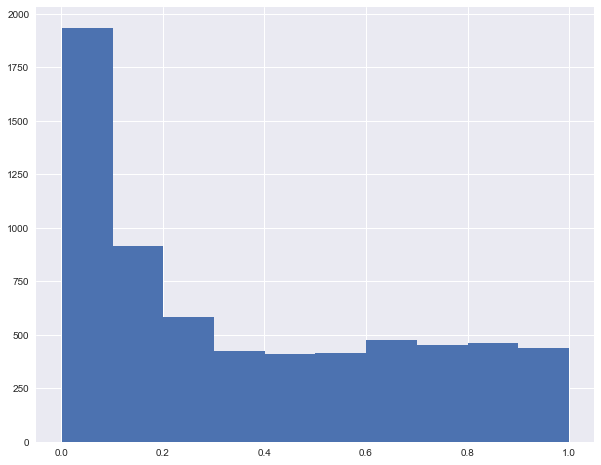

In [229]:
# check the prob distribution 
plt.hist(new_pr_average)

from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(test_y, new_pr_average)

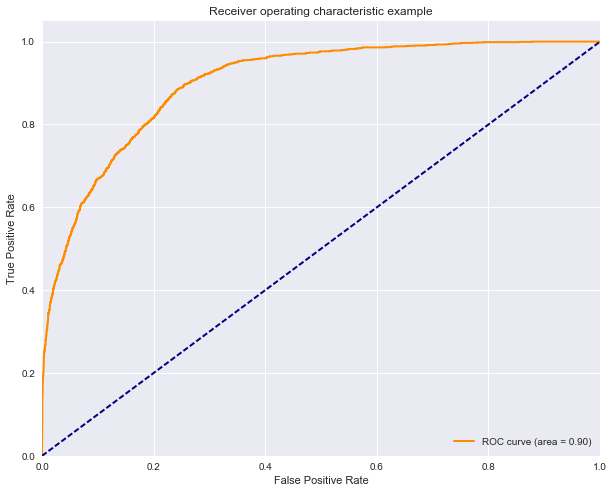

In [232]:
plt.figure()
lw = 2
roc_auc = auc(fpr,tpr)
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [234]:
print(thresholds)

i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
best_thresholds = roc.ix[(roc.tf-0).abs().argsort()[:1]]
print(best_thresholds)

# we get the best cutoff is 0.503692

[ 1.          0.99544559  0.99544553 ...,  0.02832386  0.02832042
  0.0010025 ]
        1-fpr       fpr        tf  thresholds       tpr
874  0.806654  0.193346  0.000795    0.503692  0.807449


C:\Users\zhang\AppData\Local\Programs\Python\Python36-32\lib\site-packages\ipykernel\__main__.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [235]:
# let's make the preidtcion all 0 or 1 based on the best cutoff
from sklearn.metrics import confusion_matrix

prediction_final = np.where(new_pr_average > 0.503692, 1, 0)
cnf_matrix = confusion_matrix(test_y, prediction_final)

print(cnf_matrix)


[[3976  953]
 [ 305 1279]]


In [237]:
# we get 80.6% overall accuracy, 71% recall on >50K class, 57% precison on >50K class
# 93% recall on <50K class, 81% precsion on <50K class... which is acceptable
